In [194]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Draw the map

[[-5.   -7.  ]
 [ 0.    0.  ]
 [ 1.8   0.  ]
 [-0.24  0.02]]
[[10.    -4.5  ]
 [ 0.     1.5  ]
 [-0.3   -0.36 ]
 [ 0.02   0.029]]
[[ 0.00000000e+00  3.50000000e+00]
 [ 0.00000000e+00  3.00000000e+00]
 [ 4.00000000e-02 -3.66666667e-01]
 [-1.77777778e-03  1.11111111e-02]]
[[ 3.00e+00  3.50e+00]
 [ 0.00e+00 -5.00e-01]
 [-2.25e-02  0.00e+00]
 [ 7.50e-04  1.25e-03]]
[[ 0.000e+00  3.500e+00]
 [ 0.000e+00  1.000e+00]
 [ 4.320e-02 -4.880e-02]
 [-1.152e-03  7.680e-04]]


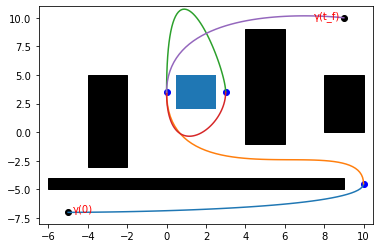

In [243]:
import matplotlib.patches as patches

fig, ax = plt.subplots()

# Add obstacles
obst1 = patches.Rectangle((4.0, -1.0), 2.0, 10.0, color='black')
obst2 = patches.Rectangle((0.5, 2.0), 2.0, 3.0)
obst3 = patches.Rectangle((-6.0, -5.0), 15.0, 1.0, color='black')
obst4 = patches.Rectangle((8.0, 0.0), 2.0, 5.0, color='black')
obst5 = patches.Rectangle((-4.0, -3.0), 2.0, 8.0, color='black')
ax.add_patch(obst1)
ax.add_patch(obst2)
ax.add_patch(obst3)
ax.add_patch(obst4)
ax.add_patch(obst5)

# Add start, goal
plt.plot(-5, -7, 'ko-')
plt.plot(9, 10, 'ko-')
plt.annotate("γ(0)", (-5,-7), textcoords="offset points", xytext=(5,0), color='r')
plt.annotate("γ(t_f)", (9,10), textcoords="offset points", xytext=(-30,0), color='r')

# Spline Trajectory --------------------------------------------
# Get from wpi (initial waypoint) to wpe (end waypoint)
def get_piece(wpi, wpe):
    a0 = wpi[1] # initial position
    a1 = wpi[2] # initial velocity
    a2 = (3*wpe[1]-3*wpi[1]-2*wpi[2]*wpe[0]-wpe[2]*wpe[0])/(wpe[0]**2)
    a3 = (2*wpi[1]+(wpi[2]+wpe[2])*wpe[0]-2*wpe[1])/(wpe[0]**3)
    return array([a0, a1, a2, a3])

def get_fxn(coef):
    x = coef[0][0] + coef[1][0]*t + coef[2][0]*t**2 + coef[3][0]*t**3
    y = coef[0][1] + coef[1][1]*t + coef[2][1]*t**2 + coef[3][1]*t**3
    return array([x, y])

# Waypoints (time, position, velocity)
wps = (0, array([-5, -7]), array([0, 0]))
wp1 = (5, array([10, -4.5]), array([0, 1.5]))
wp2 = (10, array([0, 3.5]), array([0, 3]))
wp3 = (15, array([3, 3.5]), array([0, -0.5]))
wp4 = (20, array([0, 3.5]), array([0, 1]))
wpf = (25, array([9, 10]), array([0, 0]))
plt.plot(10, -4.5, 'bo-')
plt.plot(0, 3.5, 'bo-')
plt.plot(3, 3.5, 'bo-')

# Coefficients a_n by leg
leg1 = get_piece(wps, wp1)
leg2 = get_piece(wp1, wp2)
leg3 = get_piece(wp2, wp3)
leg4 = get_piece(wp3, wp4)
leg5 = get_piece(wp4, wpf)

print(leg1)
print(leg2)
print(leg3)
print(leg4)
print(leg5)

# Plotem legs - there's definitely a better way to do this
# Functions by leg
t = linspace(0, 5)
f1 = get_fxn(leg1)
plot(f1[0], f1[1])
t = linspace(0, 10)
f2 = get_fxn(leg2)
plot(f2[0], f2[1])
t = linspace(0, 15)
f3 = get_fxn(leg3)
plot(f3[0], f3[1])
t = linspace(0, 20)
f4 = get_fxn(leg4)
plot(f4[0], f4[1])
t = linspace(0, 25)
f5 = get_fxn(leg5)
plot(f5[0], f5[1])

# --------------------------------------------------------------

# Plot it
ax.set_xlim(-6.5, 10.5)
ax.set_ylim(-8, 11)
plt.show()